# Importing Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()

# Read the DataSet

In [6]:
raw_data = pd.read_csv("Titanic-Dataset.csv")
raw_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
raw_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
data = raw_data.drop(['Cabin'], axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


# Dealing with the missing values

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [10]:
data['Age'].fillna(data['Age'].mean(), inplace = True)

In [11]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Mapping the data

In [13]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# Count of the Survivers

In [14]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

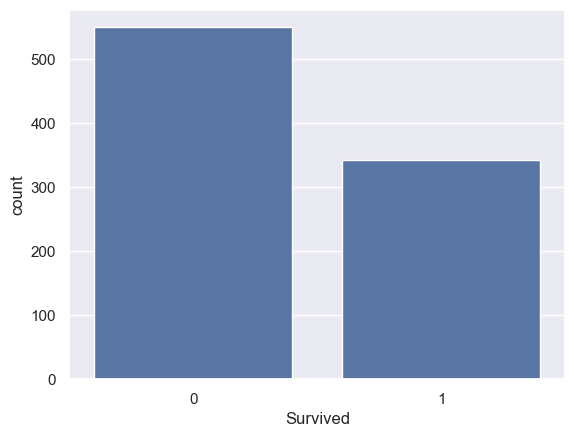

In [15]:
# visualize the count of the survivers
sns.countplot(x='Survived', data = data)

<Axes: xlabel='Sex', ylabel='count'>

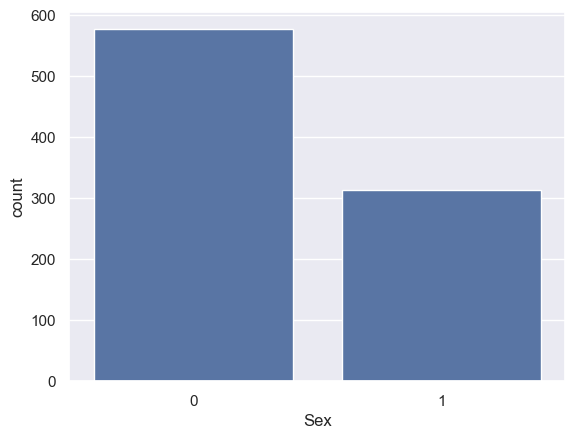

In [16]:
# visualize the count of the sex
sns.countplot(x='Sex', data= data)

<Axes: xlabel='Sex', ylabel='count'>

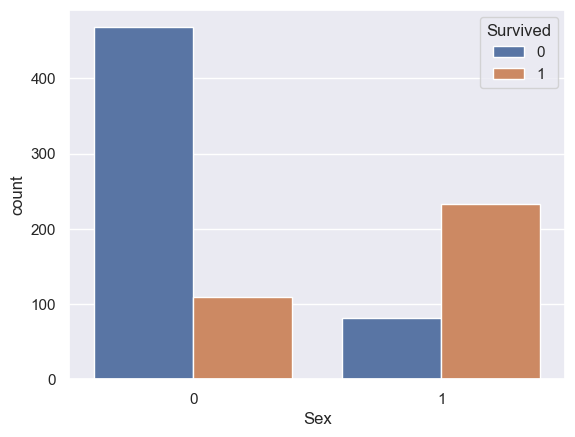

In [17]:
# visualize the count of the survivers according to sex
sns.countplot(x='Sex', hue='Survived', data=data)

<Axes: xlabel='Pclass', ylabel='count'>

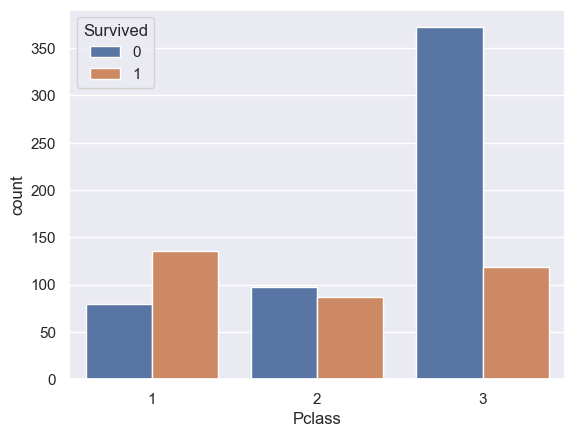

In [18]:
# visualize the count of the survivers according to Pclass
sns.countplot(x='Pclass', hue='Survived', data= data)

<Axes: xlabel='SibSp', ylabel='count'>

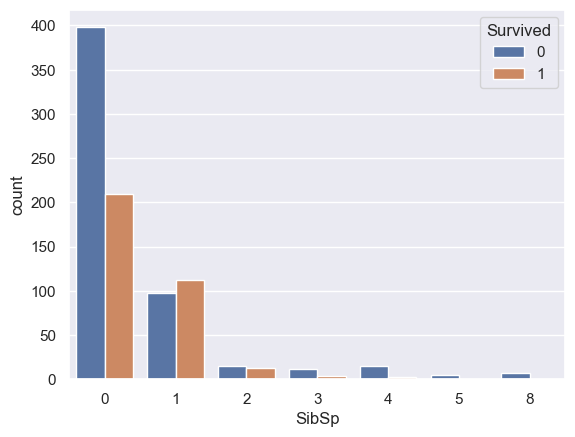

In [19]:
# visualize the count of the survivers according to SibSp
sns.countplot(x='SibSp', hue='Survived', data= data)

<Axes: xlabel='Parch', ylabel='count'>

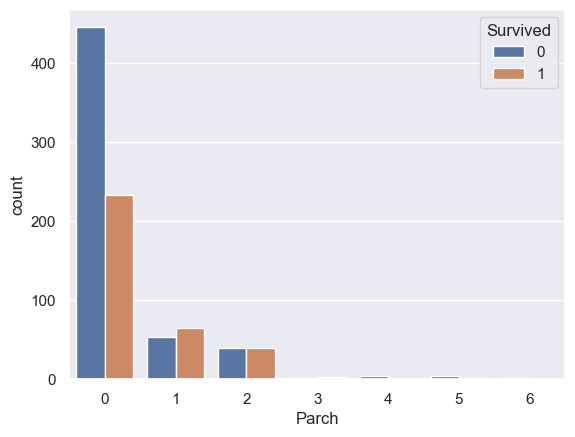

In [20]:
# visualize the count of the survivers according to Parch
sns.countplot(x='Parch', hue='Survived', data= data)

# Splitting the Inputs and Target

In [51]:
inputs = data.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Survived', 'Fare'], axis=1)
target = data['Survived']
inputs.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.0,1,0,0
1,1,1,38.0,1,0,1
2,3,1,26.0,0,0,0
3,1,1,35.0,1,0,0
4,3,0,35.0,0,0,0


# Splitting datas into Training and Test Set

In [52]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state = 365)
# shape of the datas
inputs.shape, x_train.shape, x_test.shape

((891, 6), (712, 6), (179, 6))

# Training the Model

In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
# model evaluvation
train_set_predictions = model.predict(x_train)
train_set_predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,

In [55]:
# checking the accuracy of the predictions
accuracy_train_set = accuracy_score(y_train, train_set_predictions)
accuracy_train_set

0.8033707865168539

# Testing the Model

In [56]:
# model evaluvation
test_set_predictions = model.predict(x_test)
test_set_predictions

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [57]:
# checking the accuracy of the predictions
accuracy_test_set = accuracy_score(y_test, test_set_predictions)
accuracy_test_set

0.8268156424581006

# Confusion Matrix

In [48]:
# define a function
def confusion_matrix(data, actual_values, model):
    pred_values = model.predict(data)
    bins = np.array([0, 0.5, 1])
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    return cm, accuracy

# calling the functions
cm = confusion_matrix(x_test, y_test, model)
cm

(array([[98., 10.],
        [21., 50.]]),
 0.8268156424581006)

In [49]:
# dataframe for confusion matrix
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,98.0,10.0
Actual 1,21.0,50.0


# Calculate Misclassification

In [50]:
"Misclassification rate:"+str((10+21)/179)

'Misclassification rate:0.17318435754189945'